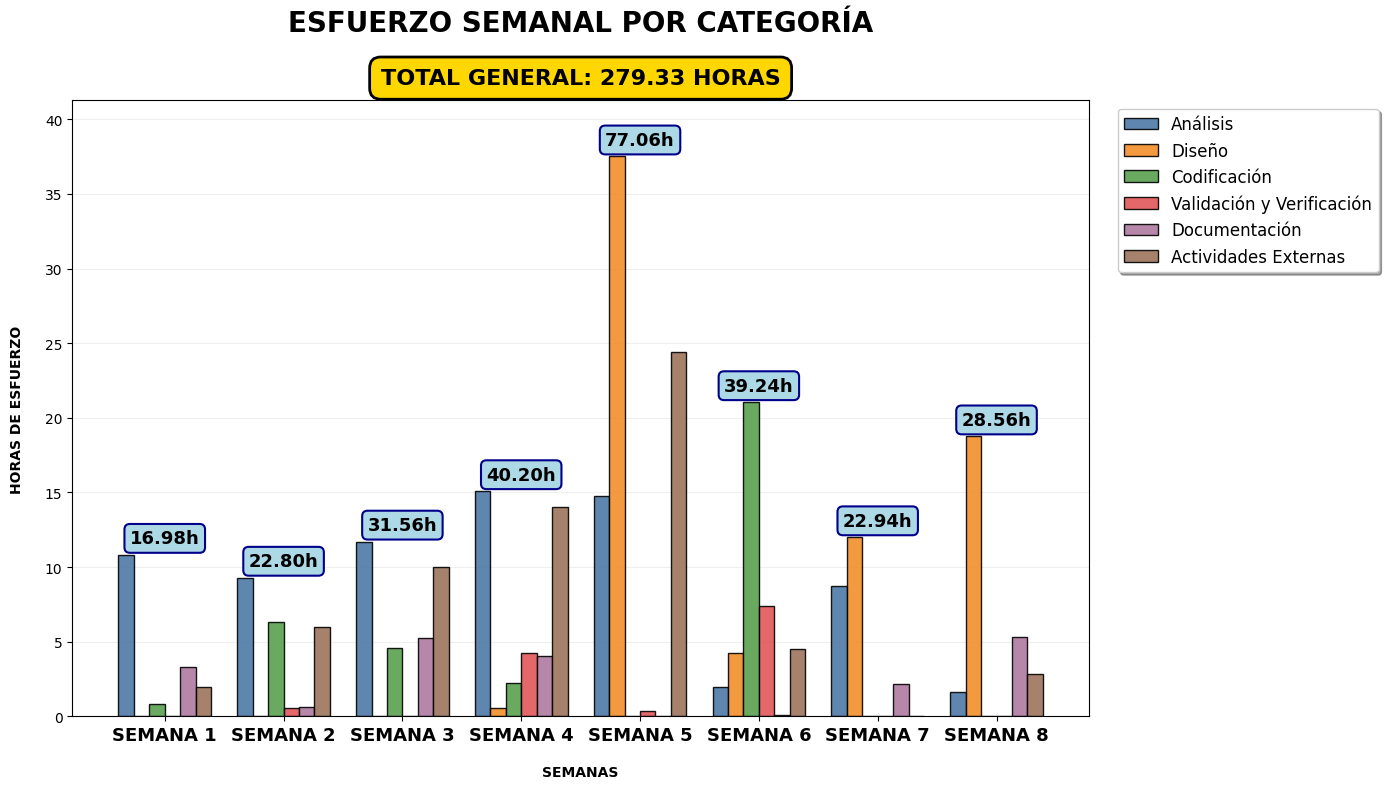

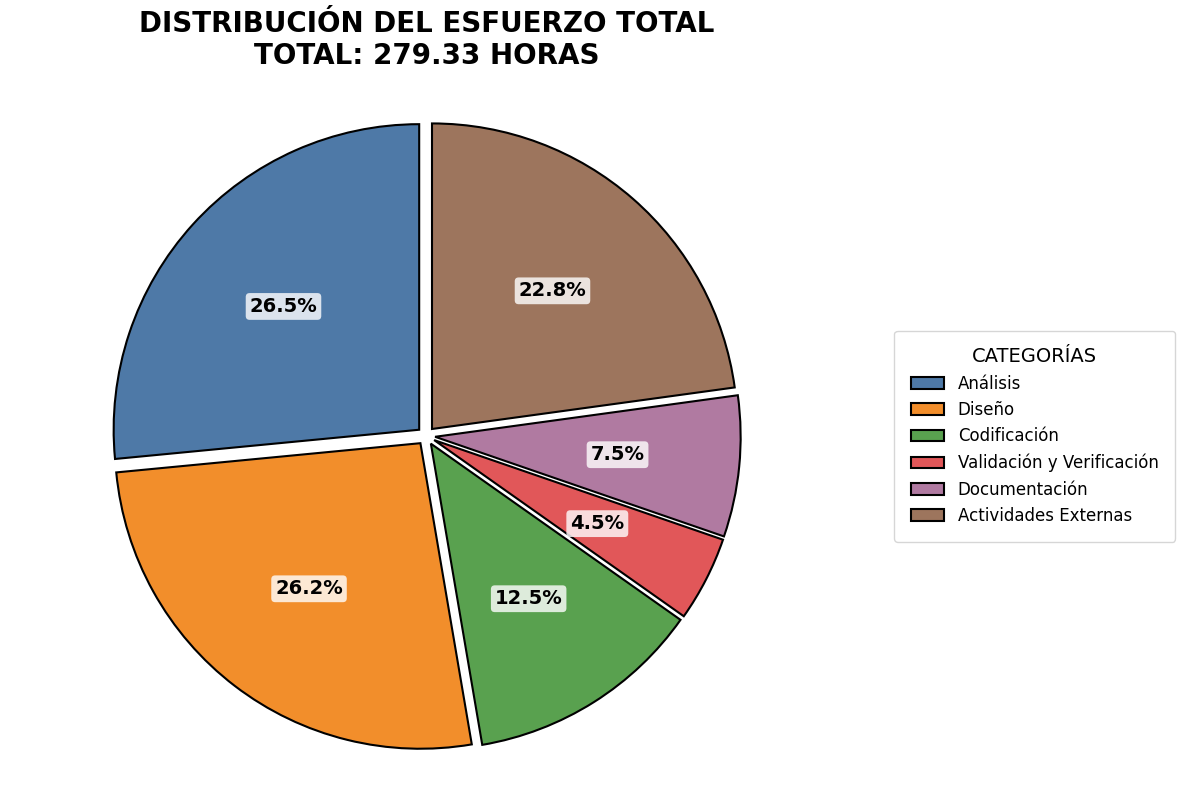

                              RESUMEN COMPLETO DE ESFUERZO (ACTUALIZADO CON SEMANAS 7 Y 8)                              
SEMANA   ANÁLISIS   DISEÑO   CODIFICACIÓN VALIDACIÓN Y VERIFICACIÓN DOCUMENTACIÓN ACTIVIDADES EXTERNAS TOTAL   
------------------------------------------------------------------------------------------------------------------------
1        10.82      0.00     0.84         0.00                   3.32          2.00                 16.98   
2        9.29       0.00     6.29         0.58                   0.64          6.00                 22.80   
3        11.71      0.00     4.60         0.00                   5.25          10.00                31.56   
4        15.09      0.58     2.22         4.27                   4.03          14.00                40.20   
5        14.78      37.51    0.00         0.33                   0.00          24.43                77.06   
6        2.00       4.23     21.05        7.37                   0.08          4.50                 3

In [1]:
# =========================================
# INSTALACIÓN DE LIBRERÍAS (si estás en Colab)
# =========================================
!pip install matplotlib pandas numpy --quiet

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta

# ================== FUNCIONES AUXILIARES ==================
# Convierte un valor tipo 'hh:mm:ss' a horas decimales
def tiempo_a_horas(valor):
    if pd.isna(valor) or str(valor).strip() == "":
        return 0.0
    try:
        partes = str(valor).split(':')
        if len(partes) == 3:
            h, m, s = map(float, partes)
        elif len(partes) == 2:
            h, m = map(float, partes)
            s = 0
        else:
            return 0.0
        return h + m / 60 + s / 3600
    except:
        return 0.0

# Función para sumar tiempos tipo 'hh:mm:ss'
def sumar_tiempos(t1, t2):
    def a_timedelta(t):
        h, m, s = map(int, t.split(":"))
        return timedelta(hours=h, minutes=m, seconds=s)
    total = a_timedelta(t1) + a_timedelta(t2)
    total_seg = int(total.total_seconds())
    h = total_seg // 3600
    m = (total_seg % 3600) // 60
    s = total_seg % 60
    return f"{h}:{m:02d}:{s:02d}"

# ================== DATOS NUEVOS ==================
datos = {
    'Semana': [1,2,3,4,5,6,7,8],
    'Análisis': [
        '10:49:24','9:17:26','11:42:39','15:05:18','14:47:00','2:00:00','8:45:42','1:38:00'
    ],
    'Diseño': [
        '0:00:00','0:00:00','0:00:10','0:35:00','37:30:29','4:13:54','12:00:00','18:45:29'
    ],
    'Codificación': [
        '0:50:13','6:17:42','4:36:00','2:13:01','0:00:00','21:03:00','0:00:00','0:00:00'
    ],
    'Validación y Verificación': [
        '0:00:00','0:34:46','0:00:00','4:16:20','0:20:00','7:22:14','0:00:00','0:00:00'
    ],
    'Documentación': [
        '3:19:00','0:38:08','5:14:46','4:02:03','0:00:00','0:05:00','2:10:47','5:20:00'
    ],
    'Actividades Externas': [
        '2:00:00','6:00:00','10:00:00','14:00:00','24:26:00','4:30:00','0:00:00','2:50:00'
    ]
}

df = pd.DataFrame(datos)
categorias = ['Análisis','Diseño','Codificación','Validación y Verificación','Documentación','Actividades Externas']

# ================== CONVERSIÓN A HORAS DECIMALES ==================
for c in categorias:
    df[c] = df[c].apply(tiempo_a_horas)

# Totales por semana y categoría
df['Total Semanal'] = df[categorias].sum(axis=1)
totales_categorias = df[categorias].sum()
total_general = totales_categorias.sum()

# ================== GRÁFICO DE BARRAS ==================
fig, ax = plt.subplots(figsize=(14,8))
colores = ['#4E79A7','#F28E2B','#59A14F','#E15759','#B07AA1','#9D755D']
x = np.arange(len(df['Semana']))
ancho_barra = 0.13

for i, categoria in enumerate(categorias):
    posiciones = x + (i - len(categorias)/2) * ancho_barra + ancho_barra/2
    ax.bar(posiciones, df[categoria], width=ancho_barra,
           label=categoria, color=colores[i],
           edgecolor='black', linewidth=1, alpha=0.9)

# Totales encima de cada grupo
for i, (semana, total) in enumerate(zip(df['Semana'], df['Total Semanal'])):
    max_altura_semana = df.loc[df['Semana']==semana, categorias].iloc[0].max()
    altura_texto = max_altura_semana + 0.5
    ax.text(x[i], altura_texto, f'{total:.2f}h',
            ha='center', va='bottom', fontsize=13, fontweight='bold', color='black',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', edgecolor='darkblue', linewidth=1.5))

plt.subplots_adjust(top=0.82)
ax.set_title('ESFUERZO SEMANAL POR CATEGORÍA', fontsize=20, fontweight='bold', pad=50, color='black')

ax.text(0.5,1.02,f'TOTAL GENERAL: {total_general:.2f} HORAS',
        ha='center', va='bottom', fontsize=16, fontweight='bold', color='black',
        transform=ax.transAxes,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='gold', edgecolor='black', linewidth=2))

ax.set_xlabel('SEMANAS', fontweight='bold', labelpad=15, color='black')
ax.set_ylabel('HORAS DE ESFUERZO', fontweight='bold', labelpad=15, color='black')
ax.set_xticks(x)
ax.set_xticklabels([f'SEMANA {s}' for s in df['Semana']], fontweight='bold', fontsize=13, color='black')

legend = ax.legend(bbox_to_anchor=(1.02,1), loc='upper left', frameon=True,
                   fancybox=True, shadow=True, fontsize=12)
for text in legend.get_texts():
    text.set_color('black')

ax.grid(True, alpha=0.2, axis='y')
ax.set_axisbelow(True)
ax.set_facecolor('white')
ax.set_ylim(0, df[categorias].values.max()*1.1)
plt.tight_layout()
plt.show()

# ================== GRÁFICO DE TORTA ==================
fig2, ax2 = plt.subplots(figsize=(12,8))
explode = [0.03]*len(categorias)
wedges, texts, autotexts = ax2.pie(
    totales_categorias,
    colors=colores,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=90,
    explode=explode,
    shadow=False,
    textprops={'fontsize':14,'fontweight':'bold','color':'black'}
)
for autotext in autotexts:
    autotext.set_bbox(dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8, edgecolor='none'))
for wedge in wedges:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(1.5)

ax2.set_title(f'DISTRIBUCIÓN DEL ESFUERZO TOTAL\nTOTAL: {total_general:.2f} HORAS',
              fontsize=20, fontweight='bold', pad=20, color='black')
ax2.legend(wedges, categorias, title="CATEGORÍAS", title_fontsize=14,
           loc="center left", bbox_to_anchor=(1.05,0,0.5,1),
           fontsize=12, frameon=True, fancybox=True, shadow=False, borderpad=1, labelcolor='black')
ax2.axis('equal')
ax2.set_facecolor('white')
plt.tight_layout()
plt.show()

# ================== TABLA RESUMEN ==================
print("="*120)
print("RESUMEN COMPLETO DE ESFUERZO (ACTUALIZADO CON SEMANAS 7 Y 8)".center(120))
print("="*120)
headers = ["SEMANA"] + [c.upper() for c in categorias] + ["TOTAL"]
print(f"{headers[0]:<8} {headers[1]:<10} {headers[2]:<8} {headers[3]:<12} {headers[4]:<22} {headers[5]:<13} {headers[6]:<20} {headers[7]:<8}")
print("-"*120)
for _, row in df.iterrows():
    print(f"{int(row['Semana']):<8} {row['Análisis']:<10.2f} {row['Diseño']:<8.2f} {row['Codificación']:<12.2f} "
          f"{row['Validación y Verificación']:<22.2f} {row['Documentación']:<13.2f} {row['Actividades Externas']:<20.2f} {row['Total Semanal']:<8.2f}")

print("\n" + "="*70)
print("TOTALES POR CATEGORÍA:")
print("="*70)
for c in categorias:
    total = totales_categorias[c]
    porcentaje = (total/total_general)*100
    print(f"{c:<26}: {total:>8.2f} horas ({porcentaje:>5.1f}%)")
print(f"\n{'TOTAL GENERAL':<26}: {total_general:>8.2f} horas")
print("="*70)
